# run programs

In [1]:
%matplotlib inline

In [2]:
!mkdir build
!cd build && cmake ..
!cd build && make

-- The CXX compiler identification is GNU 9.3.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- BUILD_CLOOP   : ON
-- BUILD_OPENMP  : ON
-- BUILD_OPENBLAS: ON
-- BUILD_CUBLA   : ON
-- LOOP_NUM      : 10
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for C++ include pthread.h
-- Looking for C++ include pthread.h - found
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Failed
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found CUDA: /usr/local/cuda (found version "11.5") 
-- Configuring done
-- Generating done
-- B

# plot graph

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("build/exec_result.csv",names=("type","num","exec_time","diff"))

df = df.drop("diff",axis=1)
df_cublas = df[df['type']=='CUBLAS'].groupby('num').describe()
df_openblas = df[df['type']=='OPENBLAS'].groupby('num').describe()
df_cloop = df[df['type']=='C_LOOP'].groupby('num').describe()
df_openmp = df[df['type']=='OPENMP'].groupby('num').describe()

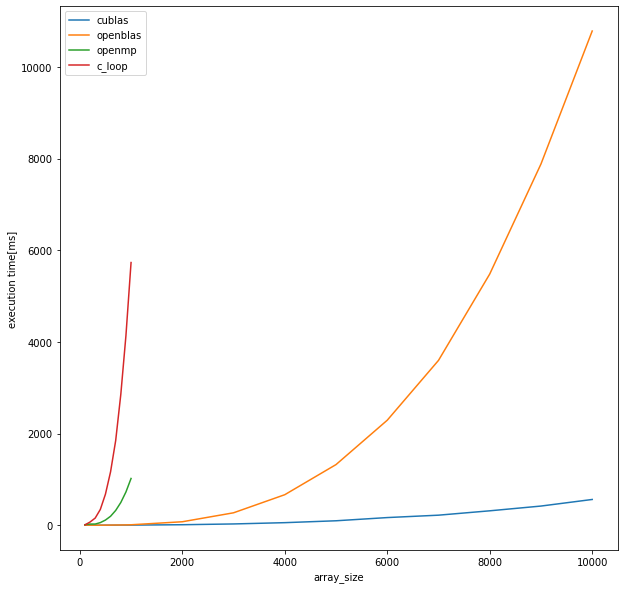

In [12]:
plt.figure(figsize=(10, 10))

plt.plot(df_cublas.index, df_cublas["exec_time", 'mean'],label="cublas")
plt.plot(df_openblas.index, df_openblas["exec_time", 'mean'],label="openblas")
plt.plot(df_openmp.index, df_openmp["exec_time", 'mean'],label="openmp")
plt.plot(df_cloop.index, df_cloop["exec_time", 'mean'],label="c_loop")

plt.xlabel('array_size')
plt.ylabel('execution time[ms]')

plt.legend()

#plt.show()
plt.savefig("blas_performance.png")